In [10]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib
from scipy.stats import circmean, circstd, circvar
import common.constants as gv
from common.plot_utils import add_vlines
from phase_plane import get_overlap_trials, carteToPolar
from common.plot_utils import save_fig

from stats.bootstrap import my_boots_ci


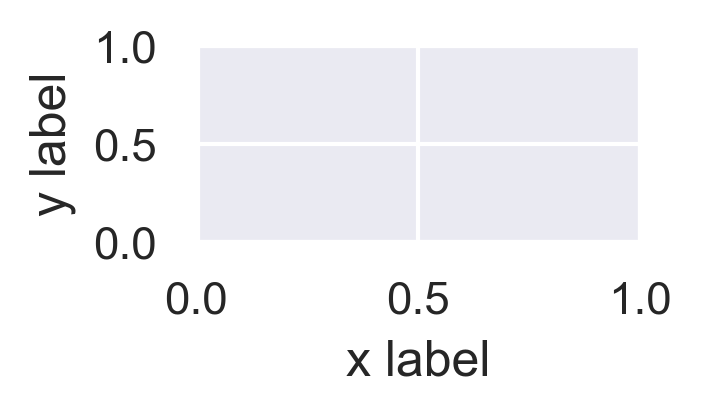

In [3]:
golden_ratio = (5**.5 - 1) / 2
width = 2.5

matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
sns.set(rc={'figure.figsize':(width, width * golden_ratio)})

plt.figure()
plt.xlabel('x label') ;
plt.ylabel('y label') ;

# Overlap

In [13]:
days = ["first", "last"]
task = "DPA"
trials = "correct"
sample = []
dist = []

for day in days:
    overlap_sample = get_overlap_trials(day, "sample", features="sample", task=task, trials=trials)
    overlap_dist = get_overlap_trials(day, "distractor", features="sample", task=task, trials=trials)

    sample.append(overlap_sample)
    dist.append(overlap_dist)
    

loading files from /home/leon/bebopalula/python/dual/data/JawsM15


SCALER standard PRESCREEN False METHOD None FOLDS stratified CLF log_loss
FEATURES sample TASK   TRIALS correct DAYS first LASER 0
X_S1 (95, 693, 84) X_S2 (100, 693, 84)
X_S3 (0, 693, 84) X_S4 (0, 693, 84)
(195, 693, 84) (195,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegressionCV(Cs=array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-0...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                      cv=StratifiedKFold(n_splits=5, random_state=3766, shuffle=True),
                                      intercept_scaling=1, max_iter=1000,
                                      penalty='l1', scoring='f1_weighted',
                                      solver='liblinear', t

ValueError: This estimator does not have a filters_ attribute:
LogisticRegressionCV(Cs=array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                     cv=StratifiedKFold(n_splits=5, random_state=3766, shuffle=True),
                     intercept_scaling=1, max_iter=1000, penalty='l1',
                     scoring='f1_weighted', solver='liblinear', tol=0.001)

In [338]:
radius_first, theta_first = carteToPolar(sample[0], dist[0])

mean_radius_first = np.mean(radius_first, axis=-1)
mean_theta_first = circmean(theta_first, axis=-1) * 180 / np.pi

std_theta_first = circstd(theta_first, axis=-1) 
var_theta_first = circvar(theta_first, axis=-1) 

radius_last, theta_last = carteToPolar(-sample[1], dist[1])
mean_radius_last = np.mean(radius_last, axis=-1) 
mean_theta_last = circmean(theta_last, axis=-1) * 180 / np.pi
std_theta_last = circstd(theta_last, axis=-1) 
var_theta_last = circvar(theta_last, axis=-1) 

tot_var_first = circvar(np.hstack(theta_first), axis=-1) 
tot_var_last = circvar(np.hstack(theta_last), axis=-1) 

mean_sample_first = np.mean(sample[0], axis=-1)
mean_sample_last = np.mean(sample[1], axis=-1)

mean_dist_first = np.mean(dist[0], axis=-1)
mean_dist_last = np.mean(dist[1], axis=-1)


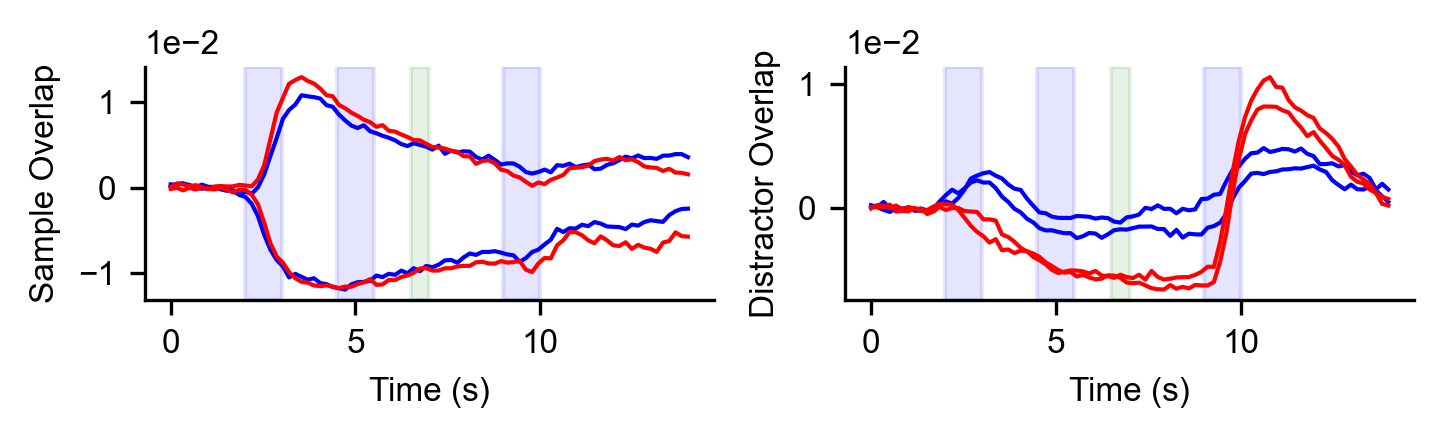

In [339]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(gv.time, np.mean(sample[0][0], -1), 'b') ;
ax1.plot(gv.time, np.mean(sample[0][1], -1), 'b') ;

ax1.plot(gv.time, np.mean(sample[1][0], -1), 'r') ;
ax1.plot(gv.time, np.mean(sample[1][1], -1), 'r') ;

ax1.set_ylabel('Sample Overlap')
ax1.set_xlabel('Time (s)')
add_vlines(ax1)
# ax1.set_xlim([0,12])

ax2.plot(gv.time, np.mean(dist[0][0], -1), 'b') ;
ax2.plot(gv.time, np.mean(dist[0][1], -1), 'b') ;

ax2.plot(gv.time, np.mean(dist[1][0], -1), 'r') ;
ax2.plot(gv.time, np.mean(dist[1][1], -1), 'r') ;

# ax2.plot(gv.time, np.mean(dist[0][0], -1) - np.mean(dist[0][1], -1), 'b') ;
# ax2.plot(gv.time, np.mean(dist[1][0], -1) - np.mean(dist[1][1], -1), 'r') ;

# ax2.set_ylabel('Choice Overlap')
ax2.set_ylabel('Distractor Overlap')
ax2.set_xlabel('Time (s)')
add_vlines(ax2)
# ax2.set_xlim([0,12])

fig.set_size_inches(2.427 * 2, 1.5)
fig.tight_layout()

In [340]:
sample[0].shape

(2, 84, 35)

In [341]:
sample_first = np.hstack(sample[0])
sample_last = np.hstack(sample[1])

dist_first = np.hstack(dist[0])
dist_last = np.hstack(dist[1])

var_first = np.nanvar(sample_first, axis=-1) 
var_last = np.nanvar(sample_last, axis=-1)

print(var_first[bins2])
print(var_last[bins2])

var_first = np.nanvar(dist_first, axis=-1) 
var_last = np.nanvar(dist_last, axis=-1)

print(var_first[bins])
print(var_last[bins])



6.539924065008424e-05
4.9163615335736775e-05
1.310903466315726e-05
1.1396625232662709e-05


In [342]:
bins0 = int(gv.t_ED[0] * gv.frame_rate)
bins = int(gv.t_ED[0] * gv.frame_rate)

bins_ED = [int(gv.t_ED[0] * gv.frame_rate), int(gv.t_ED[-1] * gv.frame_rate)]
bins_dist = int(gv.t_MD[0] * gv.frame_rate)

bins2 = int(gv.t_LD[-1] * gv.frame_rate)
bins3 = int(gv.t_ED[-1] * gv.frame_rate)

In [343]:
theta_first.shape

(2, 84, 35)

In [348]:
#####################
# First
#####################
# drift
theta_first_copy = theta_first.copy()
stack_first = np.hstack(theta_first_copy)
drift_first = stack_first - stack_first[bins]

# diff 
mean_first_0 = circmean(theta_first_copy[0], axis=-1, high=2*np.pi, low=0) 
mean_first_1 = circmean(theta_first_copy[1], axis=-1, high=2*np.pi, low=0) 

theta_first_copy[0] -= mean_first_0[:, np.newaxis]
theta_first_copy[1] -= mean_first_1[:, np.newaxis]

diff_first = np.hstack(theta_first_copy)

#####################
# last
#####################
# drift
theta_last_copy = theta_last.copy()

stack_last = np.hstack(theta_last_copy)
drift_last = stack_last - stack_last[bins]

# diff
mean_last_0 = circmean(theta_last_copy[0], axis=-1, high=2*np.pi, low=0) 
mean_last_1 = circmean(theta_last_copy[1], axis=-1, high=2*np.pi, low=0) 

theta_last_copy[0] -= mean_last_0[:, np.newaxis]
theta_last_copy[1] -= mean_last_1[:, np.newaxis]

diff_last = np.hstack(theta_last_copy)

# modulo 2 pi
diff_first[diff_first>np.pi] -= 2 * np.pi
diff_last[diff_last>np.pi] -= 2 * np.pi

diff_first[diff_first<-np.pi] += 2 * np.pi
diff_last[diff_last<-np.pi] += 2 * np.pi

drift_first[drift_first>np.pi] -= 2 * np.pi
drift_last[drift_last>np.pi] -= 2 * np.pi

drift_first[drift_first<-np.pi] += 2 * np.pi
drift_last[drift_last<-np.pi] += 2 * np.pi


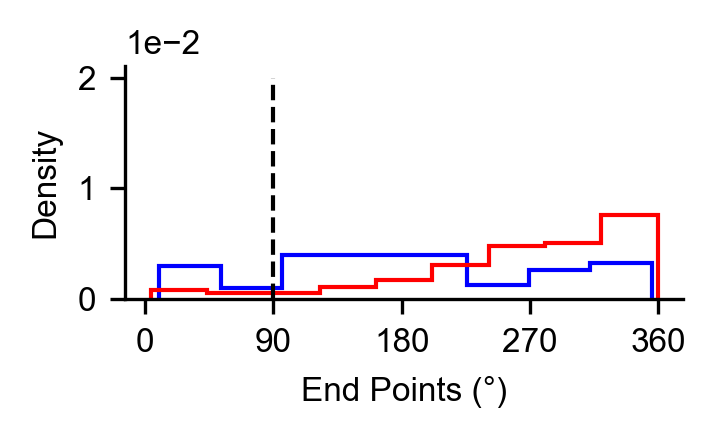

In [349]:
figname = 'phase_hist'
fig = plt.figure(figname)

plt.hist( (stack_first[bins2]) * 180 / np.pi, histtype='step', bins='auto', density=1, color='b');
plt.hist( (stack_last[bins2]) * 180 / np.pi, histtype='step', bins='auto', density=1, color='r');

# amax = np.amax( np.stack((stack_first[bins2] , stack_last[bins2]) ) )  * 180 / np.pi 

plt.plot([90, 90], [0, .02], '--k')
# plt.plot([135, 135], [0, .02], '--k')

plt.xlabel('End Points (°)')
plt.ylabel('Density')
plt.xticks([0 , 90, 180, 270, 360])

save_fig(fig, figname, path=gv.figdir)



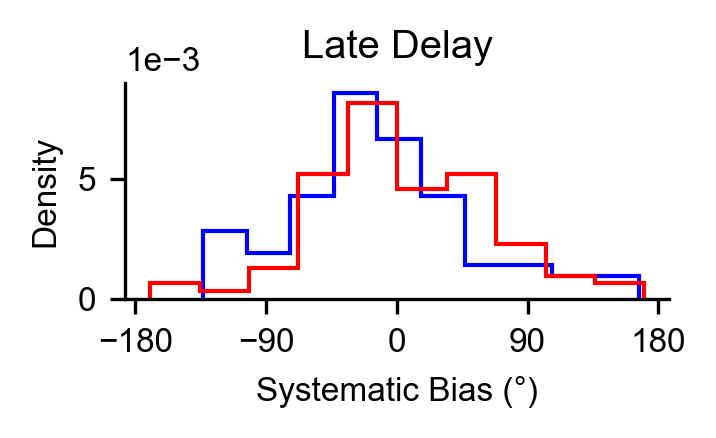

In [350]:
figname = 'drift_hist'
fig = plt.figure(figname)

plt.hist(drift_first[bins2] * 180 / np.pi, histtype='step', bins='auto', density=1, color='b');
plt.hist(drift_last[bins2] * 180 / np.pi, histtype='step', bins='auto', density=1, color='r');
# plt.plot([90, 90], [0, .03], '--k')
# plt.plot([-90, -90], [0, .03], '--k')
plt.xlabel('Systematic Bias (°)')
plt.ylabel('Density')
plt.title('Late Delay')

plt.xticks([-180, -90, 0 , 90, 180])
save_fig(fig, figname, path=gv.figdir)



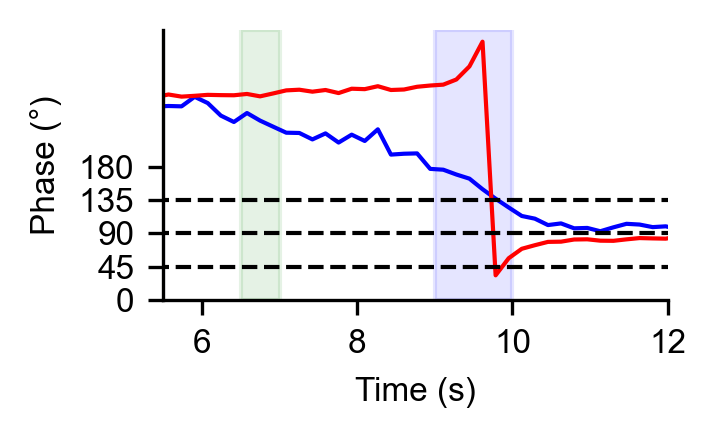

In [351]:
%matplotlib inline
mean_first = circmean(stack_first, axis=-1, high=2*np.pi, low=0) 
mean_last = circmean(stack_last, axis=-1, high=2*np.pi, low=0) 

figname = 'phase_time'
fig = plt.figure(figname)

# mean_first = circmean(stack_first, axis=-1, high=np.pi, low=0) 
# mean_last = circmean(stack_last, axis=-1, high=np.pi, low=0) 

plt.plot(gv.time[bins:], mean_first[bins:] * 180 / np.pi, color='b', alpha=1);
plt.plot(gv.time[bins:], mean_last[bins:] * 180 / np.pi, color='r', alpha=1);
plt.plot([0, 12], [90, 90], '--k')
plt.plot([0, 12], [135, 135], '--k')
plt.plot([0, 12], [45, 45], '--k')

# plt.plot(gv.time[bins:], stack_first[bins:,:10] % np.pi * 180 / np.pi, color='b', alpha=.1);
# plt.plot(gv.time[bins:], stack_last[bins:,:10] % np.pi * 180 / np.pi, color='r', alpha=.1);
add_vlines()

plt.ylabel('Phase (°)')
plt.xlabel('Time (s)')
plt.yticks([0, 45, 90, 135, 180])
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14])
plt.xlim([5.5, 12])

save_fig(fig, figname, path=gv.figdir)
plt.draw()
plt.show()

In [352]:
mean_first = circmean(theta_first[0], axis=-1, high=2*np.pi, low=0) 
mean_last = circmean(theta_last[0], axis=-1, high=2*np.pi, low=0) 


In [300]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation, PillowWriter

day = 'first'

def animate_phase(time, phase, day):
    plt.plot(np.cos(phase[time]), np.sin(phase[time]), 'bo')
    plt.xlim([-1.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sample Overlap')
    plt.ylabel('Distractor Overlap')
    if day=="first":
        plt.title('First Days')
    else:
        plt.title('Last Days')

if day=="first":
    phase = mean_first[bins:bins2]
else:
    phase = mean_last[bins:bins2]
    
print(phase.shape)

fig = plt.figure('anim_'+ day)
plt.plot(np.cos(phase[0]), np.sin(phase[0]), 'bo')
plt.xlim([-1.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('Sample Overlap')
plt.ylabel('Distractor Overlap')

if day=="first":
    plt.title('First Days')
else:
    plt.title('Last Days')

anim = FuncAnimation(fig, lambda i: animate_phase(i, phase, day), frames=phase.shape[0], interval=1, repeat=True, cache_frame_data=False) 

plt.draw()
plt.show()

writergif = PillowWriter(fps=6) 
anim.save('anim_' + day + '.gif', writer=writergif, dpi=600) 


(36,)


<IPython.core.display.Javascript object>

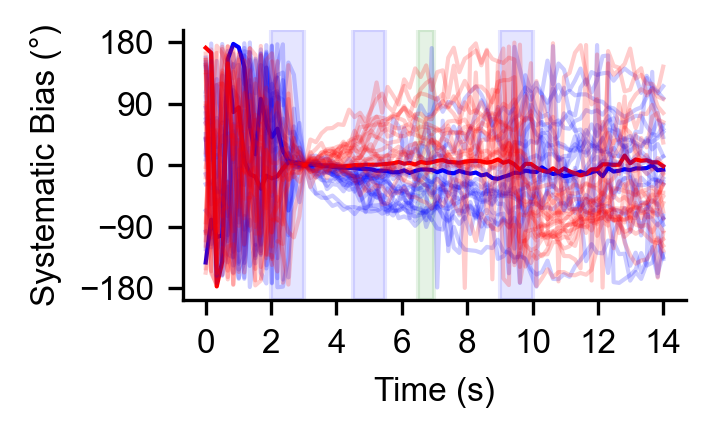

In [353]:
figname = 'drift_time'
fig = plt.figure(figname)

mean_first = circmean(drift_first, axis=-1, high=np.pi, low=-np.pi) 
mean_last = circmean(drift_last, axis=-1, high=np.pi, low=-np.pi) 

plt.plot(gv.time, mean_first * 180 / np.pi, color='b', alpha=1);
plt.plot(gv.time, mean_last * 180 / np.pi, color='r', alpha=1);

plt.plot(gv.time, drift_first[:,:20] * 180 / np.pi, color='b', alpha=.2);
plt.plot(gv.time, drift_last[:,:20] * 180 / np.pi, color='r', alpha=.2);
add_vlines()

plt.ylabel('Systematic Bias (°)')
plt.xlabel('Time (s)')
plt.yticks([-180, -90, 0 , 90, 180])
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14])

save_fig(fig, figname, path=gv.figdir)


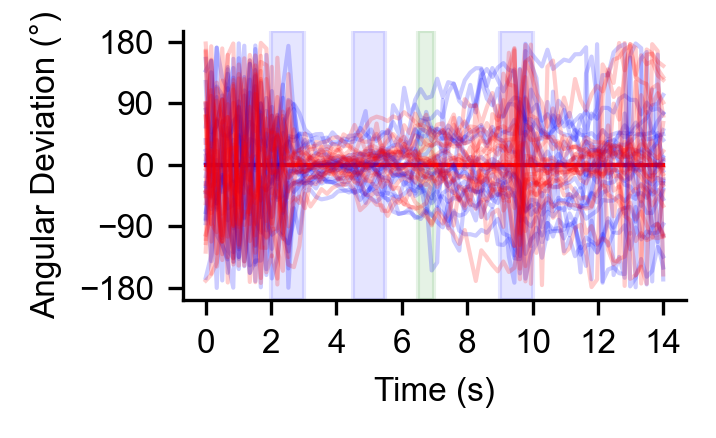

In [354]:
figname = 'diff_time'
fig = plt.figure(figname)

mean_first = circmean(diff_first, axis=-1, high=np.pi, low=-np.pi) 
mean_last = circmean(diff_last, axis=-1, high=np.pi, low=-np.pi) 

plt.plot(gv.time, mean_first * 180 / np.pi, color='b', alpha=1);
plt.plot(gv.time, mean_last * 180 / np.pi, color='r', alpha=1);

plt.plot(gv.time, diff_first[:,:20] * 180 / np.pi, color='b', alpha=.2);
plt.plot(gv.time, diff_last[:,:20] * 180 / np.pi, color='r', alpha=.2);
add_vlines()

plt.ylabel('Angular Deviation (°)')
plt.xlabel('Time (s)')
plt.yticks([-180, -90, 0 , 90, 180])
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14])

save_fig(fig, figname, path=gv.figdir)


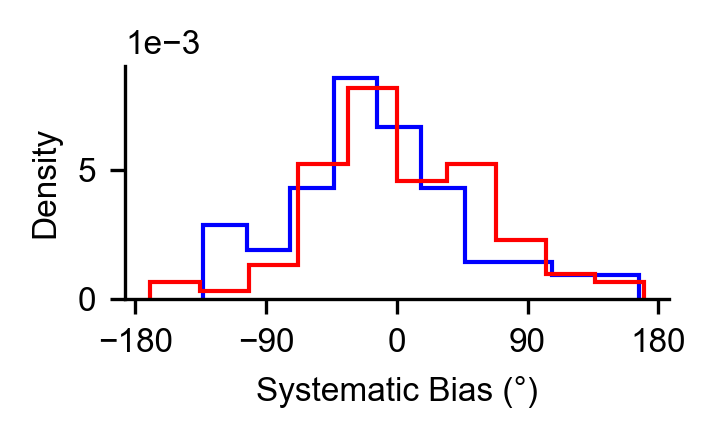

In [355]:
figname = 'drift_hist'
fig = plt.figure(figname)

plt.hist(drift_first[bins2] * 180 / np.pi, histtype='step', bins='auto', density=1, color='b');
plt.hist(drift_last[bins2] * 180 / np.pi, histtype='step', bins='auto', density=1, color='r');
# plt.xlim([-180, 180])
# plt.plot([90, 90], [0, .005], '--k')
# plt.plot([-90, -90], [0, .005], '--k')

plt.xlabel('Systematic Bias (°)')
plt.ylabel('Density')
plt.xticks([-180, -90, 0 , 90, 180])

save_fig(fig, figname, path=gv.figdir)


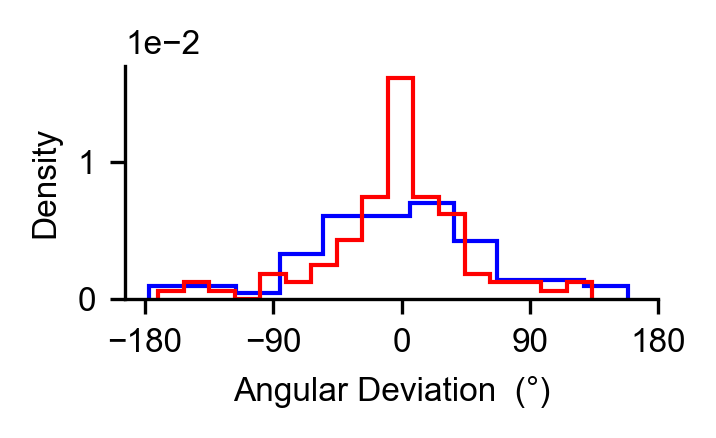

In [356]:
figname = 'diff_time'
fig = plt.figure(figname)

plt.hist(diff_first[bins2] * 180 / np.pi, histtype='step', bins='auto', density=1, color='b');
plt.hist(diff_last[bins2] * 180 / np.pi, histtype='step', bins='auto', density=1, color='r');
# plt.xlim([-180, 180])
# plt.plot([90, 90], [0, .005], '--k')
# plt.plot([-90, -90], [0, .005], '--k')

plt.xlabel('Angular Deviation  (°)') 
plt.ylabel('Density')
plt.xticks([-180, -90, 0 , 90, 180])

save_fig(fig, figname, path=gv.figdir)


In [357]:
def get_drift(Dtheta):
    # drift = np.sqrt( np.abs(np.nanmean((Dtheta)**2, axis=-1))) 
    drift = np.sqrt( np.abs(circmean((Dtheta)**2, axis=-1, high=np.pi, low=-np.pi, nan_policy='omit'))) 
    drift *= 180 / np.pi
    return drift
    

bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   7% 68/1000 [00:00<00:01, 679.58it/s]

bootstrap:  14% 145/1000 [00:00<00:01, 727.04it/s]

bootstrap:  22% 218/1000 [00:00<00:01, 703.75it/s]

bootstrap:  33% 328/1000 [00:00<00:00, 852.92it/s]

bootstrap:  48% 478/1000 [00:00<00:00, 1078.23it/s]

bootstrap:  63% 632/1000 [00:00<00:00, 1228.68it/s]

bootstrap:  77% 772/1000 [00:00<00:00, 1283.75it/s]

bootstrap:  90% 901/1000 [00:00<00:00, 1175.44it/s]

bootstrap: 100% 1000/1000 [00:00<00:00, 1146.78it/s]

stats (1000, 84)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 1/1000 [00:00<03:45,  4.44it/s]

bootstrap:   8% 77/1000 [00:00<00:03, 296.08it/s]

bootstrap:  16% 158/1000 [00:00<00:01, 475.95it/s]

bootstrap:  23% 230/1000 [00:00<00:01, 556.01it/s]

bootstrap:  30% 305/1000 [00:00<00:01, 617.87it/s]

bootstrap:  39% 387/1000 [00:00<00:00, 680.49it/s]

bootstrap:  47% 470/1000 [00:00<00:00, 726.37it/s]

bootstrap:  55% 547/1000 [00:00<00:00, 738.08it/s]

bootstrap:  62% 624/1000 [00:01<00:00, 745.82it/s]

bootstrap:  70% 701/1000 [00:01<00:00, 749.69it/s]

bootstrap:  78% 782/1000 [00:01<00:00, 762.17it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 755.39it/s]

stats (1000, 84)


(0.0, 90.0)

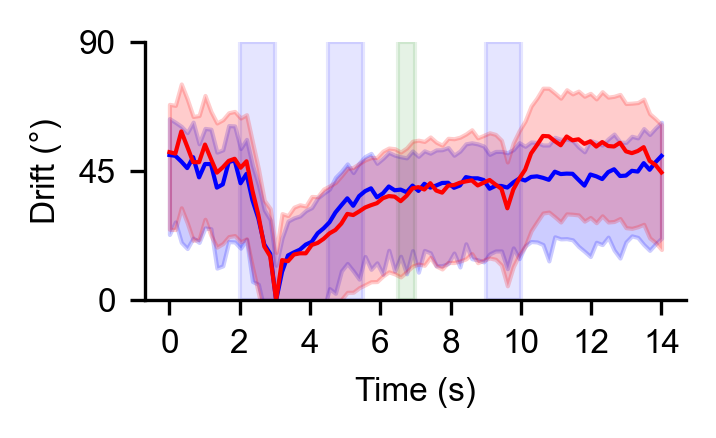

In [369]:
thresh = 90
first = drift_first.copy()
last = drift_last.copy()

idx_first = np.abs(drift_first) >= thresh * np.pi/180
first[idx_first] = np.nan

idx_last = np.abs(drift_last) >= thresh * np.pi/180
last[idx_last] = np.nan

drift_stack_first = get_drift(first)
drift_stack_last = get_drift(last)

figname = "drift_stack_" + task + "_" + trials

fig = plt.figure(figname)
plt.plot(gv.time, drift_stack_first, 'b')
plt.plot(gv.time, drift_stack_last, 'r')
plt.xlabel('Time (s)');
plt.ylabel('Drift (°)');
add_vlines()

_, drift_ci_first = my_boots_ci(first, get_drift, n_samples=1000)
_, drift_ci_last = my_boots_ci(last, get_drift, n_samples=1000)

plt.fill_between(
        gv.time,
        drift_stack_first - drift_ci_first[:, 0],
        drift_stack_first + drift_ci_first[:, 1],
        alpha=0.2,
        color='b',
    )

plt.fill_between(
        gv.time,
        drift_stack_last - drift_ci_last[:, 0],
        drift_stack_last + drift_ci_last[:, 1],
        alpha=0.2,
        color='r',
    )

plt.yticks([0, 45, 90])
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14])

plt.ylim([0, 90])
# plt.xlim([5.5, 10])
# save_fig(fig, figname, path=gv.figdir)


In [378]:
thresh = 90

first = diff_first.copy()
idx_first = np.abs(drift_first) >= thresh * np.pi/180
first[idx_first] = np.nan

last = diff_last.copy()
idx_last = np.abs(drift_last) >= thresh * np.pi/180
last[idx_last] = np.nan

# circ var
circvar_stack_first = circvar(first, axis=-1, high=np.pi, low=-np.pi, nan_policy='omit')
circvar_stack_last = circvar(last, axis=-1, high=np.pi, low=-np.pi, nan_policy='omit')

## christos style
mean_stack_first = circmean(first, axis=-1, high=np.pi, low=-np.pi, nan_policy='omit')
mean_stack_last = circmean(last, axis=-1, high=np.pi, low=-np.pi, nan_policy='omit')

# std_stack_first = np.nanmean(np.abs(first-mean_stack_first[:, np.newaxis]), axis=-1)
# std_stack_last = np.nanmean(np.abs(last-mean_stack_last[:, np.newaxis]), axis=-1)

# variance
std_stack_first = np.nanstd(first, axis=-1)
std_stack_last = np.nanstd(last, axis=-1)

# var_stack_first = np.nanvar(first, axis=-1)
# var_stack_last = np.nanvar(last, axis=-1)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   0% 2/1000 [00:00<01:57,  8.51it/s]

bootstrap:   8% 76/1000 [00:00<00:03, 284.27it/s]

bootstrap:  14% 144/1000 [00:00<00:02, 420.73it/s]

bootstrap:  22% 219/1000 [00:00<00:01, 528.33it/s]

bootstrap:  34% 340/1000 [00:00<00:00, 745.74it/s]

bootstrap:  48% 478/1000 [00:00<00:00, 944.17it/s]

bootstrap:  62% 624/1000 [00:00<00:00, 1100.46it/s]

bootstrap:  77% 767/1000 [00:00<00:00, 1198.85it/s]

bootstrap:  89% 892/1000 [00:01<00:00, 1144.12it/s]

bootstrap: 100% 1000/1000 [00:01<00:00, 914.61it/s]

stats (1000, 84)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   6% 60/1000 [00:00<00:01, 595.62it/s]

bootstrap:  13% 132/1000 [00:00<00:01, 662.55it/s]

bootstrap:  20% 205/1000 [00:00<00:01, 688.31it/s]

bootstrap:  31% 314/1000 [00:00<00:00, 841.93it/s]

bootstrap:  47% 472/1000 [00:00<00:00, 1104.78it/s]

bootstrap:  62% 620/1000 [00:00<00:00, 1230.03it/s]

bootstrap:  78% 775/1000 [00:00<00:00, 1333.32it/s]

bootstrap:  91% 909/1000 [00:00<00:00, 1289.83it/s]

bootstrap: 100% 1000/1000 [00:00<00:00, 1184.58it/s]

stats (1000, 84)


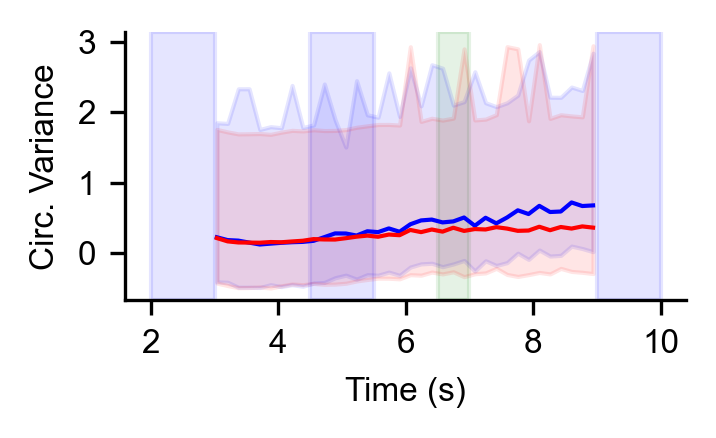

In [379]:
figname = "circvar_stack_" + task + "_" + trials
fig = plt.figure(figname)
plt.plot(gv.time[bins:bins2], circvar_stack_first[bins:bins2], 'b', alpha=1) ;
plt.plot(gv.time[bins:bins2], circvar_stack_last[bins:bins2], 'r', alpha=1) ;

add_vlines()
plt.xlabel('Time (s)') ;
# plt.ylabel('<$\delta \\phi^2$> (°)') ;
plt.ylabel('Circ. Variance')
# plt.ylim([0, 2])
save_fig(fig, figname, path=gv.figdir)

_, var_ci_first = my_boots_ci( first,
                                lambda x: circvar(x, axis=-1,  high=np.pi, low=-np.pi, nan_policy='omit') )

_, var_ci_last = my_boots_ci( last,
                              lambda x: circvar(x, axis=-1,  high=np.pi, low=-np.pi, nan_policy='omit') ) 

plt.fill_between(
        gv.time[bins:bins2],
        circvar_stack_first[bins:bins2] - var_ci_first[bins:bins2, 0],
        circvar_stack_first[bins:bins2] + var_ci_first[bins:bins2, 1],
        alpha=0.1,
        color='b',
    )

plt.fill_between(
        gv.time[bins:bins2],
        circvar_stack_last[bins:bins2] - var_ci_last[bins:bins2, 0],
        circvar_stack_last[bins:bins2] + var_ci_last[bins:bins2, 1],
        alpha=0.1,
        color='r',
    )

save_fig(fig, figname, path=gv.figdir)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   6% 55/1000 [00:00<00:01, 544.00it/s]

bootstrap:  13% 130/1000 [00:00<00:01, 664.09it/s]

bootstrap:  20% 202/1000 [00:00<00:01, 687.81it/s]

bootstrap:  29% 290/1000 [00:00<00:00, 762.72it/s]

bootstrap:  44% 444/1000 [00:00<00:00, 1041.33it/s]

bootstrap:  59% 594/1000 [00:00<00:00, 1192.63it/s]

bootstrap:  75% 752/1000 [00:00<00:00, 1316.11it/s]

bootstrap:  88% 884/1000 [00:00<00:00, 1237.59it/s]

bootstrap: 100% 1000/1000 [00:00<00:00, 1162.51it/s]

stats (1000, 84)


bootstrap:   0% 0/1000 [00:00<?, ?it/s]

bootstrap:   7% 70/1000 [00:00<00:01, 698.65it/s]

bootstrap:  14% 142/1000 [00:00<00:01, 706.48it/s]

bootstrap:  21% 213/1000 [00:00<00:01, 694.77it/s]

bootstrap:  31% 310/1000 [00:00<00:00, 797.31it/s]

bootstrap:  44% 444/1000 [00:00<00:00, 986.28it/s]

bootstrap:  58% 582/1000 [00:00<00:00, 1117.02it/s]

bootstrap:  73% 729/1000 [00:00<00:00, 1225.64it/s]

bootstrap:  85% 852/1000 [00:00<00:00, 1149.47it/s]

bootstrap: 100% 1000/1000 [00:00<00:00, 1142.51it/s]

stats (1000, 84)


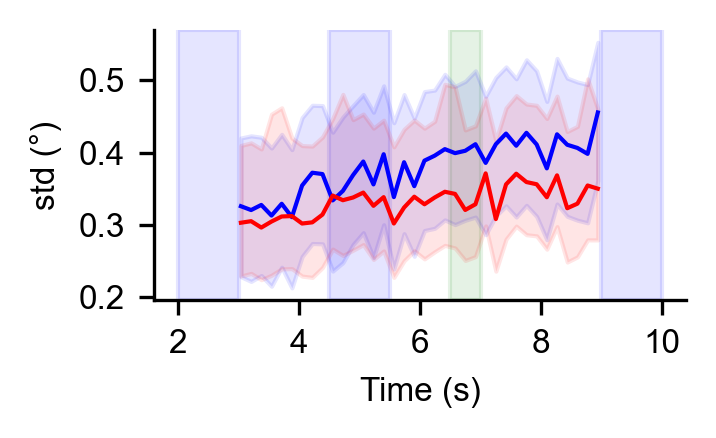

In [366]:
figname = "std_stack_" + task + "_" + trials
fig = plt.figure(figname)
plt.plot(gv.time[bins:bins2], std_stack_first[bins:bins2], 'b', alpha=1) ;
plt.plot(gv.time[bins:bins2], std_stack_last[bins:bins2], 'r', alpha=1) ;

add_vlines()
plt.xlabel('Time (s)') ;
# plt.ylabel('<$\delta \\phi^2$> (°)') ;
plt.ylabel('std (°)')
# plt.ylim([0, 1.5])
save_fig(fig, figname, path=gv.figdir)

_, var_ci_first = my_boots_ci( first,
                                lambda x: np.nanstd(x, axis=-1) )

_, var_ci_last = my_boots_ci( last,
                              lambda x: np.nanstd(x, axis=-1) ) 

plt.fill_between(
        gv.time[bins:bins2],
        std_stack_first[bins:bins2] - var_ci_first[bins:bins2, 0],
        std_stack_first[bins:bins2] + var_ci_first[bins:bins2, 1],
        alpha=0.1,
        color='b',
    )

plt.fill_between(
        gv.time[bins:bins2],
        std_stack_last[bins:bins2] - var_ci_last[bins:bins2, 0],
        std_stack_last[bins:bins2] + var_ci_last[bins:bins2, 1],
        alpha=0.1,
        color='r',
    )

save_fig(fig, figname, path=gv.figdir)


STOP HERE

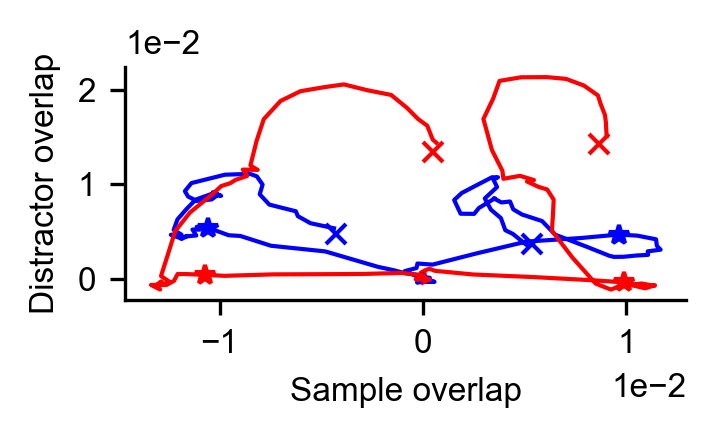

In [26]:
figname = "avg_trajectory_" + task
fig = plt.figure(figname)
plt.plot(mean_sample_first[0][:bins2], mean_dist_first[0][:bins2], 'b') ;
plt.plot(mean_sample_last[0][:bins2], mean_dist_last[0][:bins2], 'r') ;

plt.plot(mean_sample_first[1][:bins2], mean_dist_first[1][:bins2], 'b') ;
plt.plot(mean_sample_last[1][:bins2], mean_dist_last[1][:bins2], 'r') ;

plt.plot(mean_sample_first[0][bins], mean_dist_first[0][bins], '*b', ms=5) ;
plt.plot(mean_sample_last[0][bins], mean_dist_last[0][bins], '*r', ms=5) ;

plt.plot(mean_sample_first[1][bins], mean_dist_first[1][bins], '*b', ms=5) ;
plt.plot(mean_sample_last[1][bins], mean_dist_last[1][bins], '*r', ms=5) ;

plt.plot(mean_sample_first[0][bins2], mean_dist_first[0][bins2], 'xb', ms=5) ;
plt.plot(mean_sample_last[0][bins2], mean_dist_last[0][bins2], 'xr', ms=5) ;

plt.plot(mean_sample_first[1][bins2], mean_dist_first[1][bins2], 'xb', ms=5) ;
plt.plot(mean_sample_last[1][bins2], mean_dist_last[1][bins2], 'xr', ms=5) ;


plt.xlabel('Sample overlap') ;
plt.ylabel('Distractor overlap') ;
# plt.xlim([-.01, .01])
# plt.ylim([-.01, .01])
save_fig(fig, figname, path=gv.figdir)


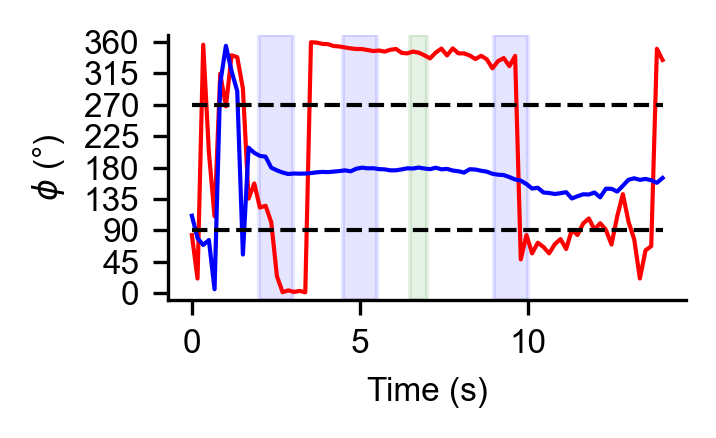

In [202]:
figname = "phase_AB_first_" + task
fig = plt.figure(figname)
plt.plot(gv.time[:], mean_theta_first[0], 'r', alpha=1) ;
# plt.plot(gv.time[:], theta_first[0,:,:5], 'r', alpha=.01) ;
plt.xlabel("Time (s)") ;
plt.ylabel("$\\phi$ (°)") ;

plt.plot(gv.time[:], mean_theta_first[1], 'b', alpha=1) ;
#plt.plot(gv.time[:], theta_first[1,:,:5], 'b', alpha=.01) ;

plt.yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
plt.ylim([-10, 370])

plt.hlines(90, 0, 14, ls='--' , color='k')
plt.hlines(180+90, 0, 14, ls='--' , color='k')

add_vlines()
save_fig(fig, figname, path=gv.figdir)


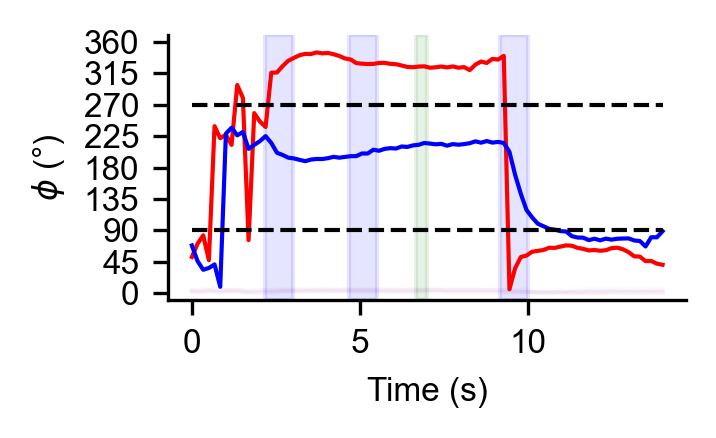

In [439]:
figname = "phase_AB_last_" + task
fig = plt.figure(figname)
plt.plot(gv.time[:], mean_theta_last[0], 'r', alpha=1) ;
plt.plot(gv.time[:], theta_last[0,:,:5], 'r', alpha=.01) ;
plt.xlabel("Time (s)") ;
plt.ylabel("$\\phi$ (°)") ;

plt.plot(gv.time[:], mean_theta_last[1], 'b', alpha=1) ;
plt.plot(gv.time[:], theta_last[1,:,:5], 'b', alpha=.01) ;

plt.yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
plt.ylim([-10, 370])

plt.hlines(90, 0, 14, ls='--' , color='k')
plt.hlines(180+90, 0, 14, ls='--' , color='k')

add_vlines()
save_fig(fig, figname, path=gv.figdir)
